# 

# Intro à Scikit-Learn - Solution

## Régression

### Données

https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset


Descripteurs (features) :

* `CRIM`: taux de criminalité par habitant par ville
* `ZN`: proportion de terrains résidentiels zonés pour les lots de plus de 25 000 pi.ca.
* `INDUS`: proportion d'acres commerciaux/non-commerciaux par ville
* `CHAS`: variable fictive de Charles River (= 1 si la zone délimite la rivière; 0 sinon)
* `NOX`: concentration d'oxydes nitriques (parties par 10 millions)
* `RM`: nombre moyen de pièces par logement
* `AGE`: proportion de logements occupés par leur propriétaire construits avant 1940
* `DIS`: distances pondérées des cinq centres d'emploi de Boston
* `RAD`: indice d'accessibilité aux autoroutes radiales
* `TAX`: taux d'imposition foncière de la valeur totale par tranche de 10 000 $
* `PTRATIO`: ratio élèves-enseignant par ville
* `B`: 1000(A - 0.63)^2 où A est la proportion d'habitants afro-américains par ville
* `LSTAT`: pourcentage d'habitant en dessous du seuil de pauvreté

Cible (target) :

* `MEDV`: Valeur médiane des logements occupés par leur propriétaire en 1 000 $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

print(sklearn.__version__)  # 0.24.1

%config InlineBackend.figure_format="retina"  # For high DPI display

1.0.2


#### Chargement des données

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
print(boston.data.shape, boston.target.shape)

(506, 13) (506,)


#### Sélection des données d'apprentissage

In [5]:
FT_NAME = "LSTAT"

idx = list(boston.feature_names).index(FT_NAME)
idx

12

Ajout d'une dimension (`np.newaxis`) lorsqu'un seul descripteur est sélectionné, pour maintenir le format en colonne(s).

In [6]:
# xs = boston.data[:, np.newaxis, idx]
# ou
xs_1d = boston.data[:, idx].reshape(-1, 1)

ys = boston.target

print(xs_1d.shape, ys.shape)

(506, 1) (506,)


Disposition attendue des descripteurs (*features*) et des valeurs cibles (*labels*):

![](img/05.02-samples-features.png)

From [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)

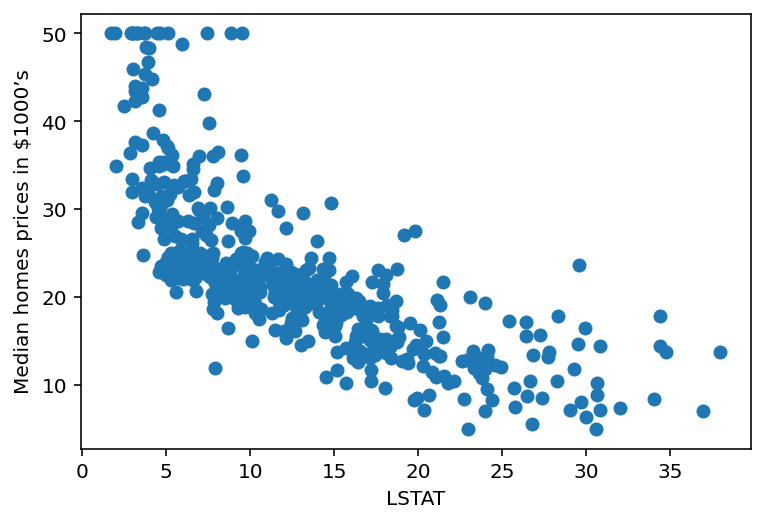

In [7]:
plt.scatter(xs_1d[:, -1], ys)
plt.xlabel(FT_NAME)
plt.ylabel("Median homes prices in $1000’s")
plt.show()

##### Échantillonnage aléatoire des données d'entrainement et de test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
from sklearn.model_selection import train_test_split

xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs_1d, ys, random_state=1
)

### Entrainement

In [10]:
# 1. Choix du modèle (classe)
from sklearn.linear_model import LinearRegression

# 2. Instantiaiton
model_1d = LinearRegression()

# 3.  Apprentissage (fit) du model
model_1d.fit(xs_train, ys_train)

# 4. predict on new data
ys_pred = model_1d.predict(xs_test)

### Résultats

#### Graphiques

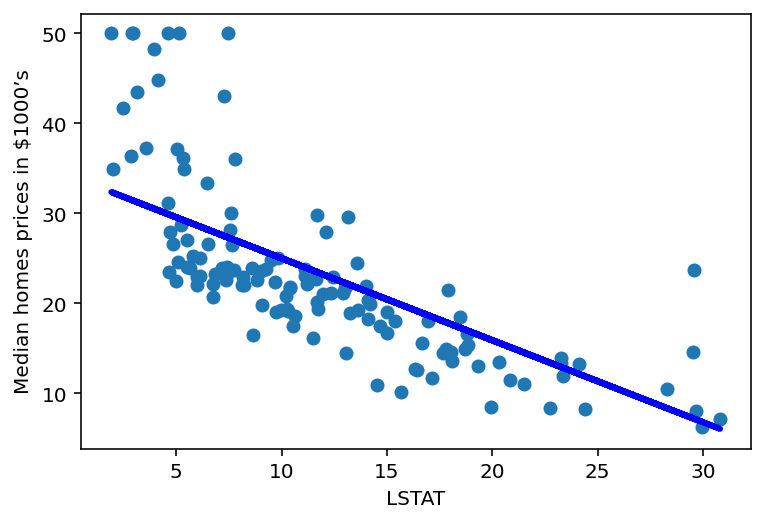

In [11]:
# Plot outputs
plt.scatter(xs_test[:, -1], ys_test)
plt.plot(xs_test[:, -1], ys_pred, color="blue", linewidth=3)
plt.xlabel(FT_NAME)
plt.ylabel("Median homes prices in $1000’s")
plt.show()

#### Évaluations

* [Mean squared error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
$$\operatorname{MSE} = \frac{1}{m}\sum _{i=1}^{m}(y_{i}-{\hat{y}_{i}})^{2} 
    = \frac{1}{m}\sum_{i=1}^m \epsilon_i^2$$
* [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
    $$
    \begin{aligned}
    R^2
    &= \frac{\mathit{SS}_{expl}}{\mathit{SS}_{tot}}
    = \frac{\sum_{i=1}^m (\hat{y}_i - \bar{y})^2}{\sum_{i=1}^m (y_i - \bar{y})^2}
    = \frac{\mathit{SS}_{tot} - \mathit{SS}_{res}}{\mathit{SS}_{tot}} \\
    &= 1 - \frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{\sum_{i=1}^m (y_i - \bar{y})^2}
    = 1 - \frac{\sum_{i=1}^m \epsilon_i^2}{\sum_{i=1}^m (y_i - \bar{y})^2}
    \end{aligned}
    $$
    * Avec :
        * $\mathit{SS}_{tot}$, la variance **totale** ; 
        * $\mathit{SS}_{expl}$, la variance **expliquée** par la régression ;
        * $\mathit{SS}_{res}$, la moyenne des carrés des **résidus** (erreurs)
    * C'est le carré du coefficient de corrélation linéaire $R$ entre les valeurs prédites $\hat{y}_i$ et les mesures $y_i$ :
$$R^2 = corr(\hat{y}, y)^2$$

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ys_test, ys_pred)
r2 = r2_score(ys_test, ys_pred)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")
# print("MSE = {:.2f}".format(mse))

MSE = 46.29
R^2 = 0.5327


In [13]:
model_1d.score(xs_test, ys_test)

0.5327362954644816

### Cas non-linéaires

* Astuce: adapter la régression linéaire en transformant les données selon des fonctions de base
* Par exemple avec une projection polynomiale:
    $$\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$
* Notez qu'il s'agit toujours d'un modèle linéaire
* Il est linéaire dans le sens où on ne multiplie ou ne divise jamais les coefficients
* Le descripteur unidimensionnel $x$ est projeté dans une ou plusieurs dimensions pour permettre de modéliser des relations plus complexes entre $x$ et $y$

In [14]:
def apply_poly_basis(arr, deg=2):
    """
    >>> arr = np.arange(1., 4.).reshape(-1, 1)
    >>> arr   # Format expected by sklearn
    array([[1.],
           [2.],
           [3.]])
    >>> apply_poly_basis(arr, deg=3)
    array([[ 1.,  1.,  1.],
           [ 2.,  4.,  8.],
           [ 3.,  9., 27.]])
    """
    assert arr.ndim == 2

    arrs = [arr**n for n in range(1, deg + 1)]

    return np.hstack(arrs)

In [15]:
# xs = boston.data[:, np.newaxis, idx]
# ou
xs_1d = boston.data[:, idx].reshape(-1, 1)

ys = boston.target

DEG = 9

# xs_train_b = apply_poly_basis(xs_train, deg=DEG)
# xs_test_b = apply_poly_basis(xs_test, deg=DEG)
# xs_test_b.shape

xs_b = apply_poly_basis(xs_1d, deg=DEG)

print(xs_b.shape, ys.shape)

(506, 9) (506,)


In [16]:
xs_train_b, xs_test_b, ys_train, ys_test = train_test_split(
    xs_b, ys, random_state=1
)

In [17]:
# 2. Instantiaiton
model_b = LinearRegression()

# 3.  Apprentissage (fit) du model
model_b.fit(xs_train_b, ys_train)

# 4. predict on new data
ys_pred_b = model_b.predict(xs_test_b)

#### Graphiques

Construction d'une `array` à valeurs croissantes qui s'étendent des bornes inférieure et supérieure des données pour produire le résultat de la régression sur le graphique.

In [18]:
def plot_regression_line(xs, model, hop, deg=None):
    # Les valeurs limites de la 1re colonne des descripteurs
    x_min, x_max = xs[:, 0].min(), xs[:, 0].max()

    # L'array qui s'étend sur l'amplitude de valeurs des données (de pas HOP)
    xx = np.arange(x_min, x_max, hop).reshape(-1, 1)

    # Regénération éventuelle de la base polynomiale
    if deg is not None:
        xx = apply_poly_basis(xx, deg=deg)

    # Prédiction à l'aide du modèle pour produire la ligne de régression à tracer
    yy_pred = model.predict(xx)

    plt.plot(xx[:, 0], yy_pred, color="blue", linewidth=3)

In [19]:
HOP = 0.1

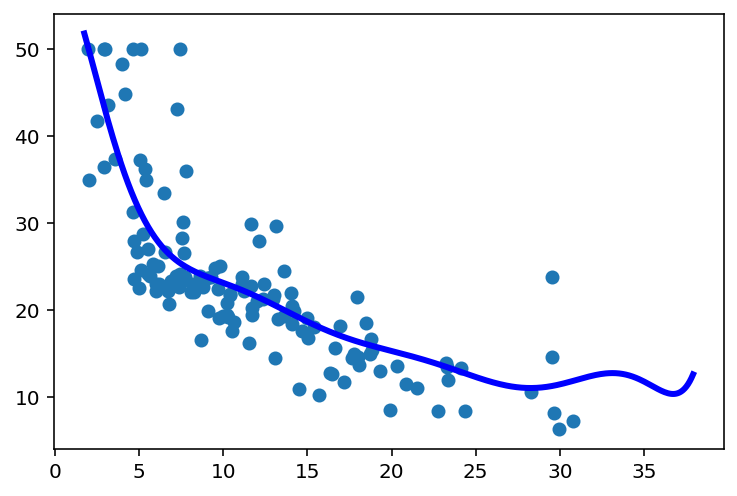

In [20]:
plot_regression_line(xs_train_b, model=model_b, hop=HOP, deg=DEG)
plt.scatter(xs_test_b[:, 0], ys_test)
plt.show()

#### Évaluations

In [21]:
mse = mean_squared_error(ys_test, ys_pred_b)
r2 = r2_score(ys_test, ys_pred_b)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 32.54
R^2 = 0.6715


In [22]:
import pandas as pd

# print("a_1 = {:.4f}, a_2 = {:.4f}".format(*model.coef_))

ft_names = [f"{FT_NAME}^{n}" for n in range(1, DEG + 1)]

# print(ft_names)

params_df = pd.DataFrame(
    {name: [param] for name, param in zip(ft_names, model_b.coef_)}
)

with pd.option_context("display.float_format", "{:.2g}".format):
    display(params_df)

,LSTAT^1,LSTAT^2,LSTAT^3,LSTAT^4,LSTAT^5,LSTAT^6,LSTAT^7,LSTAT^8,LSTAT^9
0,2.2,-5.2,1.3,-0.16,0.011,-0.00045,1.1e-05,-1.5e-07,8.6e-10


In [23]:
# Generation of markdown table from pandas DataFrame

# print(params_df.applymap("{:.2e}".format).to_markdown(index=False))

#### Résultat avec LSTAT et les descripteurs générés

|   LSTAT^1 |   LSTAT^2 |   LSTAT^3 |   LSTAT^4 |   LSTAT^5 |   LSTAT^6 |   LSTAT^7 |   LSTAT^8 |   LSTAT^9 |
|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
|      2.24 |     -5.18 |       1.3 |    -0.157 |    0.0108 |  -0.00045 |  1.11e-05 |  -1.5e-07 |  8.58e-10 |

Coefficients (paramètres du modèle) $a_1$ à $a_n$ de la régression, provenant de l'équation suivante :

$$\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$

On peut voir que la valeur absolue des coefficients est plus importante pour les 3 premiers d'entre eux. 

**Note** : 

* Cela ne signifie cependant pas qu'ils ont forcément plus d'impact sur la valeur de $\hat{y}$
* Les descripteurs $x_j$ n'étant pas centrés réduits
* Si certains présentent une plus grande variance, une même valeur de coefficient $a_j$ impliquera un plus grand impact sur $\hat{y}$

## Exercice

#### But : Tenter d'améliorer le résultat de la régression linéaire

* Réalisez de nouveau la régression linéaire en utilisant l'ensemble des 13 descripteurs (*features*) proposé, au lieu d'un seul. La sélection s'opère dès l'étape :
[Sélection des données d'apprentissage](#Sélection-des-données-d'apprentissage)

* Générez d'autres descripteurs en prenant, par exemple, le carré de leurs valeurs, pour prendre en compte la non-linéarité des relations

* Évaluez la performance de la régression en terme de MSE et R^2

* Identifiez les descripteurs qui semblent les plus significatifs pour cette régression, en observant la valeur de leur paramètre respectif ($a_j$ via `model.coef_`)

$$\hat{y}^{(i)} = a_0 + a_1 x_1^{(i)} + a_2 x_2^{(i)} + \ldots + a_n x_n^{(i)}$$

* Commentez succinctement

* Notez que la visualisation pose problème lorsque que l'on utilise plus d'un descripteur (plus de 2 en particulier), elle n'est donc pas nécessaire pour cet exercice

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [24]:
DEG = 2

In [25]:
xs = boston.data
print(xs.shape)

ys = boston.target

(506, 13)


In [26]:
# xs = np.hstack([xs, xs**2])
# ou
xs = apply_poly_basis(xs, deg=DEG)

print(xs.shape, ys.shape)

(506, 26) (506,)


#### (Optionnel) Apprentissage à partir des données centrées réduites

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs = scaler.fit_transform(xs)
ys = scaler.fit_transform(ys.reshape(-1, 1))  # Format colonne pour le scaler

In [28]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, random_state=1)

In [29]:
# 2. Instantiaiton
model_all = LinearRegression()

# 3.  Apprentissage (fit) du model
model_all.fit(xs_train, ys_train)

# 4. predict on new data
ys_pred = model_all.predict(xs_test)

#### Évaluations

In [30]:
mse = mean_squared_error(ys_test, ys_pred)
r2 = r2_score(ys_test, ys_pred)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 0.14
R^2 = 0.8819


Eval | 13 fts | 13 fts deg 2 | 13 fts deg 3 | 13 fts deg 4 | 13 fts deg 9 | 
---  | ---    | ---          | ---          | ---          | ---          |
MSE  | 21.90  | 11.69        | 12.27        | 13.86        | 57.87        |
r^2  | 0.7789 | 0.8819       | 0.8761       | 0.8601       | 0.4158       |

In [31]:
ft_names = list(boston.feature_names)
ft_names = ft_names + [f"{name}^2" for name in ft_names]

coef_dic = {
    name: [param] for name, param in zip(ft_names, model_all.coef_.squeeze())
}

params_df = pd.DataFrame.from_dict(coef_dic, orient="index", columns=["Coef"])

In [32]:
with pd.option_context("display.float_format", "{:.2g}".format):
    display(params_df.sort_values("Coef", key=abs, ascending=False))

,Coef
RM^2,1.5
RM,-1.3
PTRATIO,-1.2
LSTAT,-1.1
PTRATIO^2,0.94
LSTAT^2,0.61
DIS,-0.56
RAD,0.5
TAX,-0.49
CRIM,-0.34


In [33]:
# print(
#     params_df.sort_values("Coef", key=abs, ascending=False)
#     .applymap("{:.2e}".format)
#     .to_markdown()
# )

#### Paramètres du modèle pour les 13 descripteurs brutes (sans normalisation)

|           |       Coef |
|:----------|-----------:|
| NOX       | -20.3      |
| RM        | -16.5      |
| PTRATIO   |  -4.93     |
| NOX^2     |  -3.9      |
| DIS       |  -2.43     |
| RM^2      |   1.49     |
| LSTAT     |  -1.37     |
| CHAS      |   1.25     |
| CHAS^2    |   1.25     |
| RAD       |   0.532    |
| CRIM      |  -0.369    |
| INDUS     |  -0.194    |
| DIS^2     |   0.122    |
| PTRATIO^2 |   0.114    |
| ZN        |  -0.0722   |
| AGE       |  -0.0311   |
| TAX       |  -0.0265   |
| LSTAT^2   |   0.0236   |
| B         |   0.0225   |
| INDUS^2   |   0.00835  |
| RAD^2     |  -0.00685  |
| CRIM^2    |   0.00284  |
| ZN^2      |   0.000884 |
| AGE^2     |   0.000295 |
| B^2       |  -3.96e-05 |
| TAX^2     |   1.95e-05 |

On peut voir que les valeurs absolues des coefficients NOX et RM sont plus importantes que pour les autres descripteurs.

Comme pour le cas polynomial, et pour les mêmes raisons, cela ne signifie pas qu'ils ont forcément plus d'impact sur la valeur de $\hat{y}$.

**Rappel** :

* Les descripteurs $x_j$ n'étant pas centrés-réduits
* Si certains présentent une plus grande variance, une même valeur de coefficient $a_j$ impliquera un plus grand impact sur $\hat{y}$

#### (Optionnel) Descripteurs [centrés réduits](https://fr.wikipedia.org/wiki/Variable_centrée_réduite)

Si l'on entraine le modèle avec des données centrées réduites, on peut voir (ci-dessous) que les descripteurs RM^2, RM, PTRATIO, LSTAT, PTRATIO^2 présentent des coefficients plus importants que les autres. On peut donc supposer qu'ils sont ceux ayant le plus d'impact sur la prédiction de $\hat{y}$.

À l'inverse, on peut voir que les descripteurs ZN^2, AGE^2, B^2, TAX^2 sont ceux ayant a priori le moins d'impact sur la prédiction de $\hat{y}$.

#### Paramètres du modèle pour la référence et les 13 descripteurs [centrés réduits](https://fr.wikipedia.org/wiki/Variable_centrée_réduite)

|           |    Coef |
|:----------|--------:|
| RM^2      |  1.48   |
| RM        | -1.26   |
| PTRATIO   | -1.16   |
| LSTAT     | -1.06   |
| PTRATIO^2 |  0.944  |
| LSTAT^2   |  0.606  |
| DIS       | -0.556  |
| RAD       |  0.503  |
| TAX       | -0.486  |
| CRIM      | -0.345  |
| TAX^2     |  0.334  |
| DIS^2     |  0.281  |
| NOX       | -0.255  |
| B         |  0.223  |
| ZN        | -0.183  |
| RAD^2     | -0.181  |
| B^2       | -0.18   |
| ZN^2      |  0.175  |
| CRIM^2    |  0.158  |
| INDUS^2   |  0.155  |
| INDUS     | -0.145  |
| AGE^2     |  0.111  |
| AGE       | -0.0951 |
| NOX^2     | -0.059  |
| CHAS^2    |  0.0346 |
| CHAS      |  0.0346 |

---

In [34]:
import doctest

doctest.testmod()

TestResults(failed=0, attempted=3)

---